# Online dating trends
#### By Sarah Wontorcik
As technology becomes more and more accessible and integrated into our daily life, dating websites and apps have become more common across the board. 

In [103]:
library(reshape2)
library(ggplot2)
library(stringr)
library(dplyr)
library(RColorBrewer)

In [4]:
datingdata <- read.csv("datingdata2015.csv")
head(datingdata)

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737


In [57]:
tinderData <- read.csv("tinderData.csv")
head(tinderData)

Question,Segment.Type,Segment.Description,Answer,Count,Percentage
Have you ever met up with someone off tinder?,Mobile,Mobile respondents,Yes,797,0.207
Have you ever met up with someone off tinder?,Mobile,Mobile respondents,No,1969,0.511
Have you ever met up with someone off tinder?,Mobile,Mobile respondents,I don't use Tinder,1090,0.283
Have you ever met up with someone off tinder?,Web,Web-based respondents,Yes,0,0.000
Have you ever met up with someone off tinder?,Web,Web-based respondents,No,0,0.000
Have you ever met up with someone off tinder?,Web,Web-based respondents,I don't use Tinder,0,0.000


In [106]:
useTinder <- tinderData %>%
    filter(Segment.Type == "University", Segment.Description == "Cornell University" | 
           Segment.Description == "University of Wisconsin-Madison" | 
           Segment.Description == "Johns Hopkins University" | 
           Segment.Description == "Northwestern University" | 
           Segment.Description == "University of California, Berkeley") %>%
    group_by(Segment.Description, Answer, Count) %>%
    summarize(
        count = n()
    ) %>% arrange(desc(Count)) 
head(useTinder)

Segment.Description,Answer,Count,count
Cornell University,No,95,1
Johns Hopkins University,No,76,1
University of Wisconsin-Madison,No,71,1
Northwestern University,No,65,1
Cornell University,I don't use Tinder,51,1
Cornell University,Yes,47,1


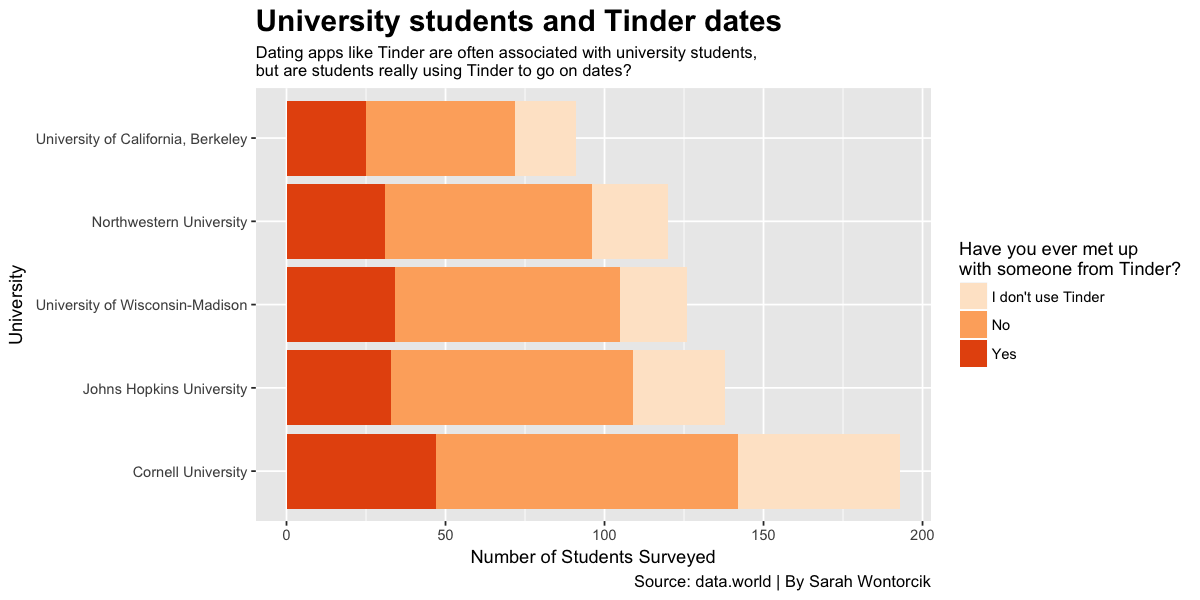

In [116]:
ggplot(useTinder, aes(reorder(Segment.Description, -Count), weight=Count, fill=Answer)) + 
    geom_bar() + 
    coord_flip() + 
    scale_fill_brewer(palette="Oranges", name="Have you ever met up 
with someone from Tinder?") +
    labs(x="University", y="Number of Students Surveyed", title="University students and Tinder dates", 
    subtitle="Dating apps like Tinder are often associated with university students,
but are students really using Tinder to go on dates?", 
    caption="Source: data.world | By Sarah Wontorcik") + 
    theme(plot.title = element_text(size = 18, face = "bold"))

Depite the fact that dating apps like Tinder are often associated most closely with the university student demographic, this data shows that the majority of students who have used Tinder aren't using it to meet people.

In [46]:
datingByAge <- datingdata %>% 
    filter(date1a == 1 | date2a == 1) %>%
    group_by(age) %>%
    summarize(
        count = n(),
    )
head(datingByAge)

age,count
18,2
19,7
20,7
21,5
22,5
23,9


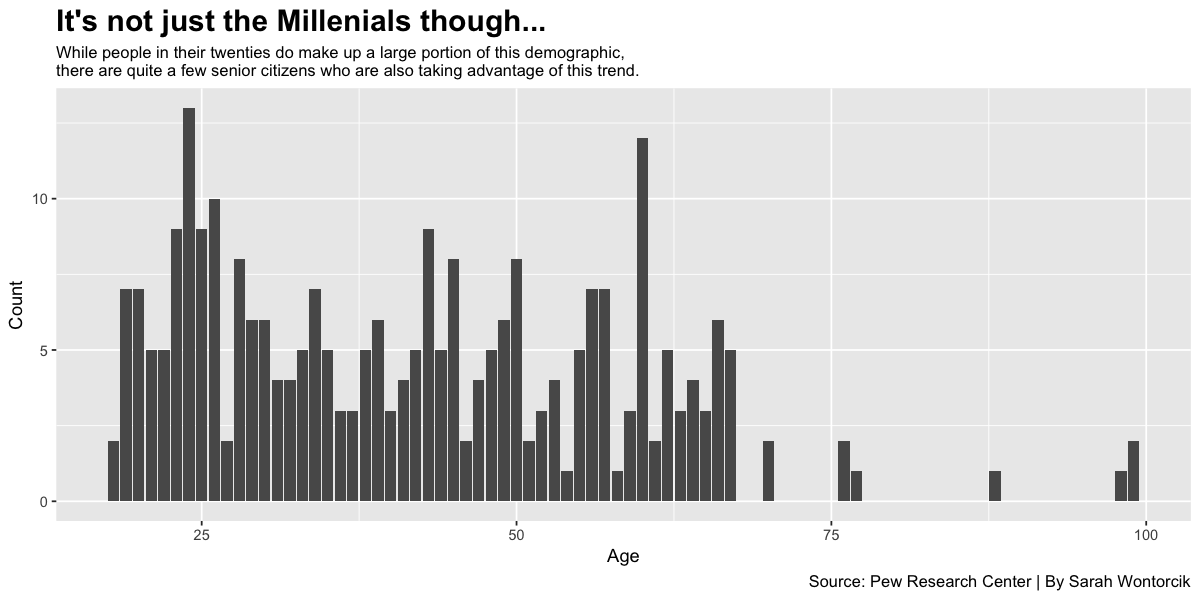

In [71]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(datingByAge, aes(x=age, weight=count)) + geom_bar() +
    labs(x="Age", y="Count", title="It's not just the Millenials though...", 
    subtitle="While people in their twenties do make up a large portion of this demographic, 
there are quite a few senior citizens who are also taking advantage of this trend.", 
    caption="Source: Pew Research Center | By Sarah Wontorcik") +
    theme(plot.title = element_text(size = 18, face = "bold"))